In [1]:
from model import Generator, Discriminator
from loss import ContentLoss,  GeneratoradversarialLoss, DiscriminatorLoss
import torch 
import torch.nn as nn
torch.set_num_threads(1)
import config
from imageloader import create_dataloaders
from torchvision.models import vgg19, VGG19_Weights
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
device = config.DEVICE

# Create the models
discriminator = Discriminator(input_channels=config.DISCRIMINATOR_INPUT_CHANNELS).to(device)
generator = Generator(in_channels=3, out_channels=3, 
                      num_residual_blocks=config.NUM_RESIDUAL_BLOCKS, 
                      num_upsample_blocks=config.NUM_UPSAMPLE_BLOCKS, 
                      upsample_factor=2).to(device)

# Create the optimizers
generator_optim = torch.optim.Adam(generator.parameters(), lr=1e-4)
discriminator_optim = torch.optim.Adam(discriminator.parameters(), lr=1e-4)

# Create the loss functions
generator_adversarial_loss = GeneratoradversarialLoss().to(device)
discriminator_loss = DiscriminatorLoss().to(device)
content_loss = ContentLoss().to(device)

# Create the dataloaders
train_loader, validation_loader, test_loader = create_dataloaders(low_res_dir=config.LOW_RES_FOLDER, 
                                                                high_res_dir=config.HIGH_RES_FOLDER, 
                                                                batch_size=config.BATCH_SIZE, 
                                                                num_workers=config.NUM_WORKERS)

In [3]:
# Load the parameters of the generator
generator.load_state_dict(torch.load("/Users/archismanchakraborti/Downloads/generator", map_location=torch.device('cpu')))

generator.eval()

lr, hr = next(iter(train_loader))
test_image_lr, test_image_hr = lr[0].unsqueeze(0).to(device), hr[0].unsqueeze(0).to(device) 
output_image = generator(test_image_lr)

In [51]:
test_image_lr.shape, test_image_hr.shape, output_image.shape

(torch.Size([1, 3, 32, 32]),
 torch.Size([1, 3, 128, 128]),
 torch.Size([1, 3, 128, 128]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'High Resolution Image')

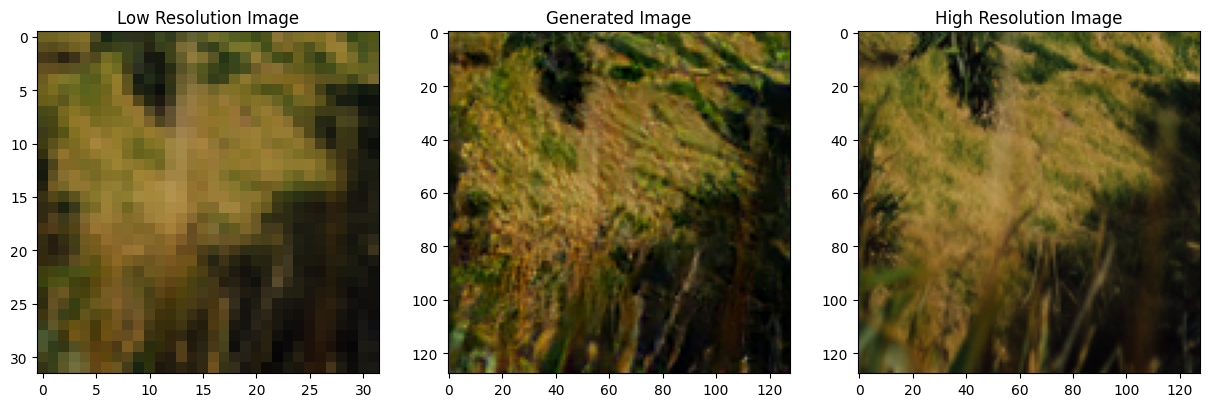

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(np.transpose(test_image_lr.cpu().detach().numpy()[0], (1, 2, 0)))
ax[0].set_title("Low Resolution Image")
ax[1].imshow(np.transpose(output_image.cpu().detach().numpy()[0], (1, 2, 0)))
ax[1].set_title("Generated Image")
ax[2].imshow(np.transpose(test_image_hr.cpu().detach().numpy()[0], (1, 2, 0)))
ax[2].set_title("High Resolution Image")

In [32]:
path = "/Users/archismanchakraborti/Downloads/IMG_20240602_100723.jpg"
img = Image.open(path).resize((32, 32))
img = np.array(img)
img = np.transpose(img, (2, 0, 1)).astype(np.float32)
img = torch.tensor(img).unsqueeze(0).to(device)
output_image = generator(img)

In [33]:
output_image = output_image.squeeze(0)
output_image = np.transpose(output_image.cpu().detach().numpy(), (1, 2, 0)) / 255.0
img = np.transpose(img.squeeze(0).cpu().detach().numpy(), (1, 2, 0)) / 255.0

output_image.shape, img.shape

((128, 128, 3), (32, 32, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


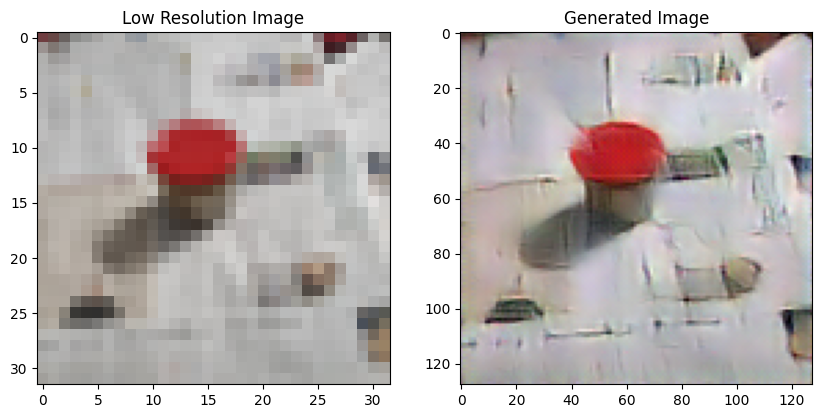

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img)
ax1.set_title("Low Resolution Image")
ax2.imshow(output_image)
ax2.set_title("Generated Image")
plt.show()